In [1]:
#@title Imports
# !pip install -q symbulate
from symbulate import *

# !pip install tabulate
from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

# Handout 08: Multiple Testing

## Exer 8.1

### a) Most powerful level $\alpha_0=0.05$ test for $n=9$

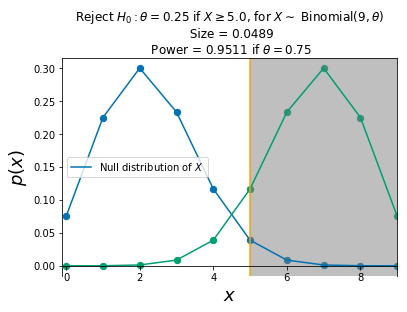

In [2]:
alpha0 = 0.05

n = 9

theta0 = 0.25

theta1 = 0.75

c = 1 + Binomial(n, theta0).quantile(1 - alpha0)

size = 1 - Binomial(n, theta0).cdf(c - 1)

power = 1 - Binomial(n, theta1).cdf(c - 1)

Binomial(n, theta0).plot()
Binomial(n, theta1).plot()

plt.xlim(-0.1, n)
plt.legend([r'Null distribution of $X$']);
plt.axvline(x = c, color = 'orange');
plt.axvspan(c, n, alpha = 0.5, color = 'gray');
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$p(x)$", fontsize=18);
plt.title(r"Reject $H_0:\theta =%s$" % theta0 +
          r" if $X\geq %s$" % c +
          r", for $X\sim$ Binomial$(%s, \theta)$" % n +
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\theta=%s$" % theta1);

### Bonferroni adjustment, $m=35$

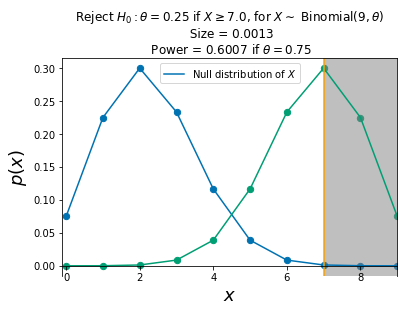

In [3]:
alpha0 = 0.05 / 35

n = 9

theta0 = 0.25

theta1 = 0.75

c = 1 + Binomial(n, theta0).quantile(1 - alpha0)

size = 1 - Binomial(n, theta0).cdf(c - 1)

power = 1 - Binomial(n, theta1).cdf(c - 1)

Binomial(n, theta0).plot()
Binomial(n, theta1).plot()

plt.xlim(-0.1, n)
plt.legend([r'Null distribution of $X$']);
plt.axvline(x = c, color = 'orange');
plt.axvspan(c, n, alpha = 0.5, color = 'gray');
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$p(x)$", fontsize=18);
plt.title(r"Reject $H_0:\theta =%s$" % theta0 +
          r" if $X\geq %s$" % c +
          r", for $X\sim$ Binomial$(%s, \theta)$" % n +
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\theta=%s$" % theta1);

### Bonferroni adjustment, $m=1000$

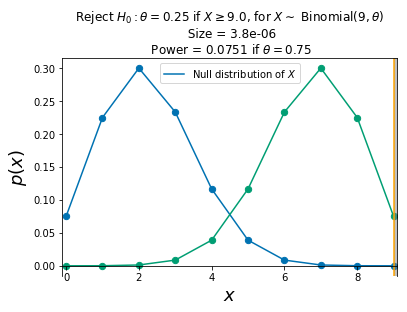

In [4]:
alpha0 = 0.05 / 1000

n = 9

theta0 = 0.25

theta1 = 0.75

c = 1 + Binomial(n, theta0).quantile(1 - alpha0)

size = 1 - Binomial(n, theta0).cdf(c - 1)

power = 1 - Binomial(n, theta1).cdf(c - 1)

Binomial(n, theta0).plot()
Binomial(n, theta1).plot()

plt.xlim(-0.1, n + 0.1)
plt.legend([r'Null distribution of $X$']);
plt.axvline(x = c, color = 'orange');
plt.axvspan(c, n + 0.1, alpha = 0.5, color = 'gray');
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$p(x)$", fontsize=18);
plt.title(r"Reject $H_0:\theta =%s$" % theta0 +
          r" if $X\geq %s$" % c +
          r", for $X\sim$ Binomial$(%s, \theta)$" % n +
          "\n Size = %s" % round(size, 7) +
          "\n Power = %s" % round(power, 4) +
          r" if $\theta=%s$" % theta1);

### Null distribution of p-value

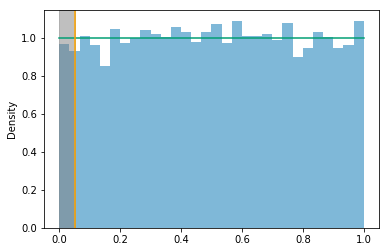

In [5]:
mu0 = 98.6

n = 4

sigma = 1

P0 = Normal(mu0, sigma) ** n
X_H0 = RV(P0)

def pvalue_x(x):
    z = abs(x.mean() - mu0) / (sigma / sqrt(n))
    return 2 * Normal(0, 1).cdf(-z)

Pvalue_H0 = X_H0.apply(pvalue_x)

pvalues_H0 = Pvalue_H0.sim(10000)

pvalues_H0.plot()

Uniform(0, 1).plot()

alpha0 = 0.05

plt.axvline(x = alpha0, color = 'orange');
plt.axvspan(0, alpha0, alpha = 0.5, color = 'gray');

### Alternative distribution of p-value

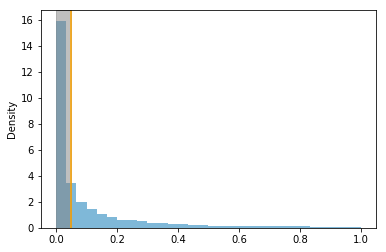

In [6]:
mu0 = 98.6

mu1 = 97.5

n = 4

sigma = 1

P1 = Normal(mu1, sigma) ** n # simulate under H1

def pvalue_x(x):
    z = abs(x.mean() - mu0) / (sigma / sqrt(n)) # standardize wrt H0
    return 2 * Normal(0, 1).cdf(-z)

Pvalue_H1 = RV(P1, pvalue_x)

pvalues_H1 = Pvalue_H1.sim(10000)

pvalues_H1.plot()

plt.axvline(x = alpha0, color = 'orange');
plt.axvspan(0, alpha0, alpha = 0.5, color = 'gray');

### Multiple tests

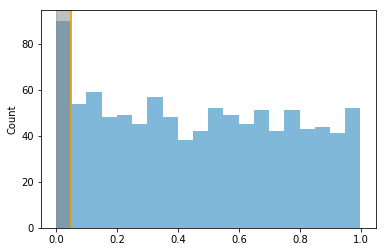

In [7]:
m = 1000

mu0 = 98.6

mu1 = 97.5

p1 = 0.1

n = 4

sigma = 1

def I_X_sim():
    i = Bernoulli(p1).draw()
    if i == 0:
        mu = mu0
    else:
        mu = mu1
    x = (Normal(mu, sigma) ** n).draw()
    return i, x

I, X = RV(ProbabilitySpace(I_X_sim))

def pvalue_x(x):
    z = abs(x.mean() - mu0) / (sigma / sqrt(n)) # standardize wrt H0
    return 2 * Normal(0, 1).cdf(-z)

Pvalue = X.apply(pvalue_x)

pvalues = Pvalue.sim(m)

pvalues.plot(bins = 20, normalize = False)

plt.axvline(x = alpha0, color = 'orange');
plt.axvspan(0, alpha0, alpha = 0.5, color = 'gray');